**ANÁLISIS SINTÁCTICO**

*John Atkinson*

Este programa despliega árboles sintácticos simples para oraciones de entrada a partir de una gramática simple, utilizando parsers disponibles en la biblioteca [NLTK](http://www.nltk.org/book/ch08-extras.html).

La gramática a utilizar se encuentra en el  archivo "**airline.cfg**".

Primero, necesitamos instalar algunos paquetes:


In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm

Utilizaremos algunos efectos de visuaización. Note que Google Colab no permite desplegar gráficos directamente. Debido a ello, debemos crear un entorno de despliegue "virtual" (en caso contrario, esta celda de instalación NO es necesaria):

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
!apt install ghostscript python3-tk
# Crear despliegue virtual de tamaño  1600x1200 y color de 16 bits. 
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')   
# Indicar a clientes que deben utilizar esta variable de entorno DISPLAY 
os.environ['DISPLAY']=':1.0'    
!pip install svgling

Importamos bibliotecas de SPaCY y de NLTK para realizar parsing simple:

In [21]:
import nltk
from nltk.parse import ChartParser
import es_core_news_sm
from IPython.display import display

Definimos la función **Analizar(oracion, gramatica)**, que dada una **gramática** y una **oración**, realiza el char parsing y muestra los árboles sintácticos resultantes.

El árbol puede desplegarse en dos modos:

*   *String*: la estructura se muestra en notación de paréntesis anidados, para futuros análisis.
*   *Árbol*:  la estructura se muestra gráficamente como árbol de derivación (parse tree).

Si utiliza una de ellas, la otra debe dejarla como "comentario":

In [23]:
def Analizar(oracion,gramatica):
  Parser = ChartParser(gramatica)
  Trees =  Parser.parse(oracion)
  for Arbol in Trees:
      print(Arbol)
      display(Arbol)
      print(ExtraerFrases(Arbol, "FN"))

Una vez que obtengo un árbol, puedo necesitar una aplicación en donde necesite extraer algún grupo sintáctico de dicho árbol. Para este propósito, definimos la función **ExtraerFrases(MiArbol,grupo)**, que extrae (recursivamente) una lista de todos las frases del tipo **grupo** (i.e., un sub-árbol), desde el árbol **MiAbol** previamente generado. Por ejemplo, podemos invocarla como, **ExtraerFrases(MiArbol, "NP")**, para obtener las frases nominales:

In [14]:
def ExtraerFrases(MiArbol, grupo):
    MisFrases = []
    if (MiArbol.label() == grupo):
        MisFrases.append( MiArbol.copy(True) )
    for child in MiArbol:
        if (type(child) is nltk.tree.Tree):
            ListaFrases = ExtraerFrases(child, grupo)
            if (len(ListaFrases) > 0):
                MisFrases.extend(ListaFrases)
    return MisFrases

Ahora, realizamos algunas inicializaciones para el programa principal. 

Debe asegurarse que la gramática ("**airline.cfg**") compartida por el profesor está cargada en Colab. 

*ROOT* apunta a la regla de comienzo en la gramática:

In [15]:
nlp = es_core_news_sm.load()

Gramatica =  "/content/drive/MyDrive/airline.cfg"
ROOT = "O"

Cargamos la gramática que está almacenada en *Gramatica*:

In [16]:
gramatica = nltk.data.load("file:" + Gramatica)

Luego, le pedimos al usuario que ingrese una oración de entrada y la analizamos:

Ingrese oracion: quiero un vuelo
(O (Aux quiero) (FN (art un) (nom_com vuelo)))


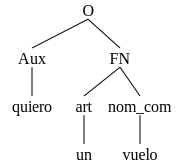

[Tree('FN', [Tree('art', ['un']), Tree('nom_com', ['vuelo'])])]


In [24]:
raw_sentence = input("Ingrese oracion: ") 
oracion = raw_sentence.split()
Analizar(oracion,gramatica)